# Data Cleaning

In [126]:
import numpy as np
import pandas as pd
import ast 

In [127]:
metadata_df = pd.read_csv('/home/benchuser/data/metadata_df.csv')

In [128]:
metadata_df.groupby("lc").count()

,chip_id,dates,x_center,y_center,epsg
lc,,,,,
1,17700,17700,17700,17700,17700
2,4642,4642,4642,4642,4642
4,1,1,1,1,1
5,10007,10007,10007,10007,10007
7,631,631,631,631,631
8,16900,16900,16900,16900,16900
11,63648,63648,63648,63648,63648


In [129]:
len(metadata_df) 

113529

In [130]:
# drop flooded vegetation
metadata_df = metadata_df = metadata_df[metadata_df.lc != 4]

In [131]:
metadata_df.groupby("lc").count()

,chip_id,dates,x_center,y_center,epsg
lc,,,,,
1,17700,17700,17700,17700,17700
2,4642,4642,4642,4642,4642
5,10007,10007,10007,10007,10007
7,631,631,631,631,631
8,16900,16900,16900,16900,16900
11,63648,63648,63648,63648,63648


In [132]:
def drop_rows(metadata_df, lc_class, count_to_drop):
    import random
    index_to_drop = random.sample(sorted(metadata_df[metadata_df.lc==lc_class].index.values), count_to_drop)
    metadata_df = metadata_df.drop(index_to_drop)

    return metadata_df

In [133]:
# drop class 1
metadata_df = drop_rows(metadata_df, 1, 13500)
# drop class 5
metadata_df = drop_rows(metadata_df, 5, 6000)
# drop class 8
metadata_df = drop_rows(metadata_df, 8, 12500)
# drop class 11
metadata_df = drop_rows(metadata_df, 11, 59000)

In [134]:
metadata_df.groupby("lc").count()

,chip_id,dates,x_center,y_center,epsg
lc,,,,,
1,4200,4200,4200,4200,4200
2,4642,4642,4642,4642,4642
5,4007,4007,4007,4007,4007
7,631,631,631,631,631
8,4400,4400,4400,4400,4400
11,4648,4648,4648,4648,4648


In [135]:
metadata_df["index"] = np.arange(0, len(metadata_df))

In [136]:
metadata_df = metadata_df.rename(columns={"chip_id" : "original_chip_id"})

In [138]:
metadata_df = metadata_df.rename(columns={"index" : "chip_id"})

In [140]:
metadata_df.head()

,original_chip_id,dates,lc,x_center,y_center,epsg,chip_id
0,113528,"['20230304', '20230627', '20230930', '20231219']",5,449990.0,4391170.0,32630,0
3,113525,"['20230304', '20230627', '20230930', '20231219']",5,498990.0,4393170.0,32630,1
17,113511,"['20230304', '20230627', '20230930', '20231219']",5,447990.0,4398170.0,32630,2
24,113504,"['20230304', '20230627', '20230930', '20231219']",5,488990.0,4401170.0,32630,3
26,113502,"['20230304', '20230627', '20230930', '20231219']",5,481990.0,4401170.0,32630,4


In [141]:
metadata_df.to_csv('/home/benchuser/data/cleaned_df.csv', index=False)

In [ ]:
# {'No Data': 0,
#  'Water': 1,
#  'Trees': 2,
#  'Flooded vegetation': 4,
#  'Crops': 5,
#  'Built area': 7,
#  'Bare ground': 8,
#  'Snow/ice': 9,
#  'Clouds': 10,
#  'Rangeland': 11}

In [143]:
import shutil
for row in metadata_df.iterrows():
    for date in ast.literal_eval(row[1]["dates"]):
        src_file = f"/home/benchuser/data/s2_{row[1]["original_chip_id"]:06}_{date}.tif"
        dst_file = f"/home/benchuser/final_data/s2_{row[1]["chip_id"]:06}_{date}.tif"
        shutil.copy2(src_file, dst_file)

In [144]:
shutil.copy2("/home/benchuser/data/cleaned_df.csv", "/home/benchuser/final_data/cleaned_df.csv")

'/home/benchuser/final_data/cleaned_df.csv'

In [145]:
import shutil

folder_to_zip = '/home/benchuser/final_data'
output_zip_file = '/home/benchuser/data'

shutil.make_archive(output_zip_file, 'zip', folder_to_zip)

'/home/benchuser/data.zip'

## Sample Visualizations

In [147]:
cleaned_df = pd.read_csv('/home/benchuser/data/cleaned_df.csv')

In [149]:
cleaned_df.head()

,original_chip_id,dates,lc,x_center,y_center,epsg,chip_id
0,113528,"['20230304', '20230627', '20230930', '20231219']",5,449990.0,4391170.0,32630,0
1,113525,"['20230304', '20230627', '20230930', '20231219']",5,498990.0,4393170.0,32630,1
2,113511,"['20230304', '20230627', '20230930', '20231219']",5,447990.0,4398170.0,32630,2
3,113504,"['20230304', '20230627', '20230930', '20231219']",5,488990.0,4401170.0,32630,3
4,113502,"['20230304', '20230627', '20230930', '20231219']",5,481990.0,4401170.0,32630,4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.4968].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0432].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.8962].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0448].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0888].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4.224].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.6288].
Clipping input data to the valid range for imshow with R

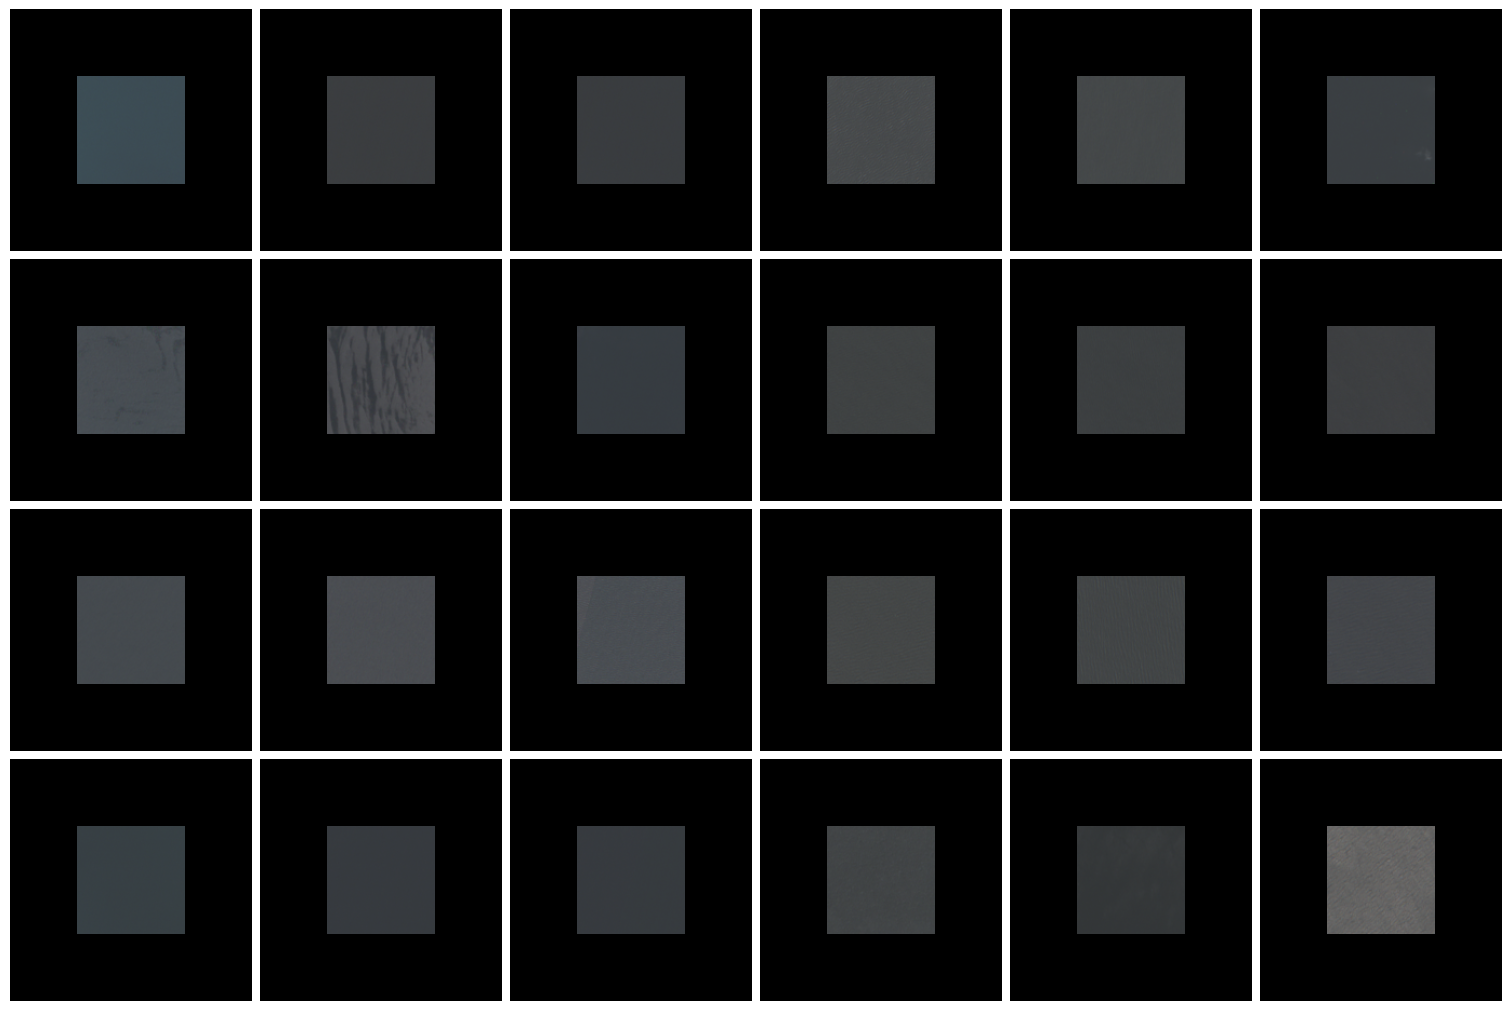

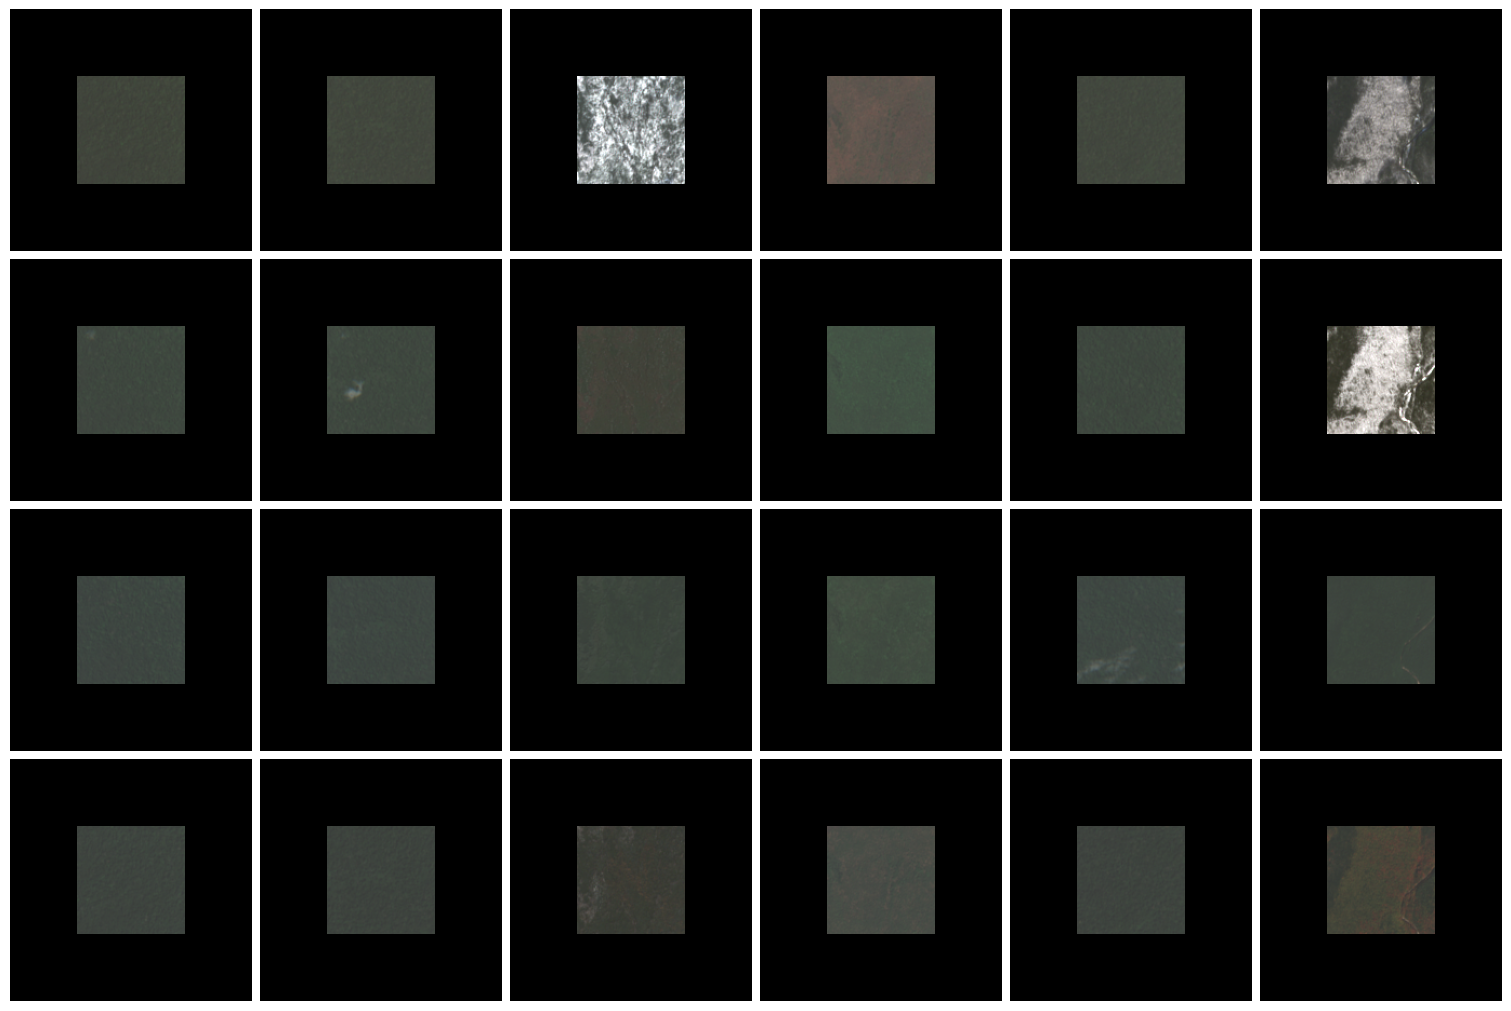

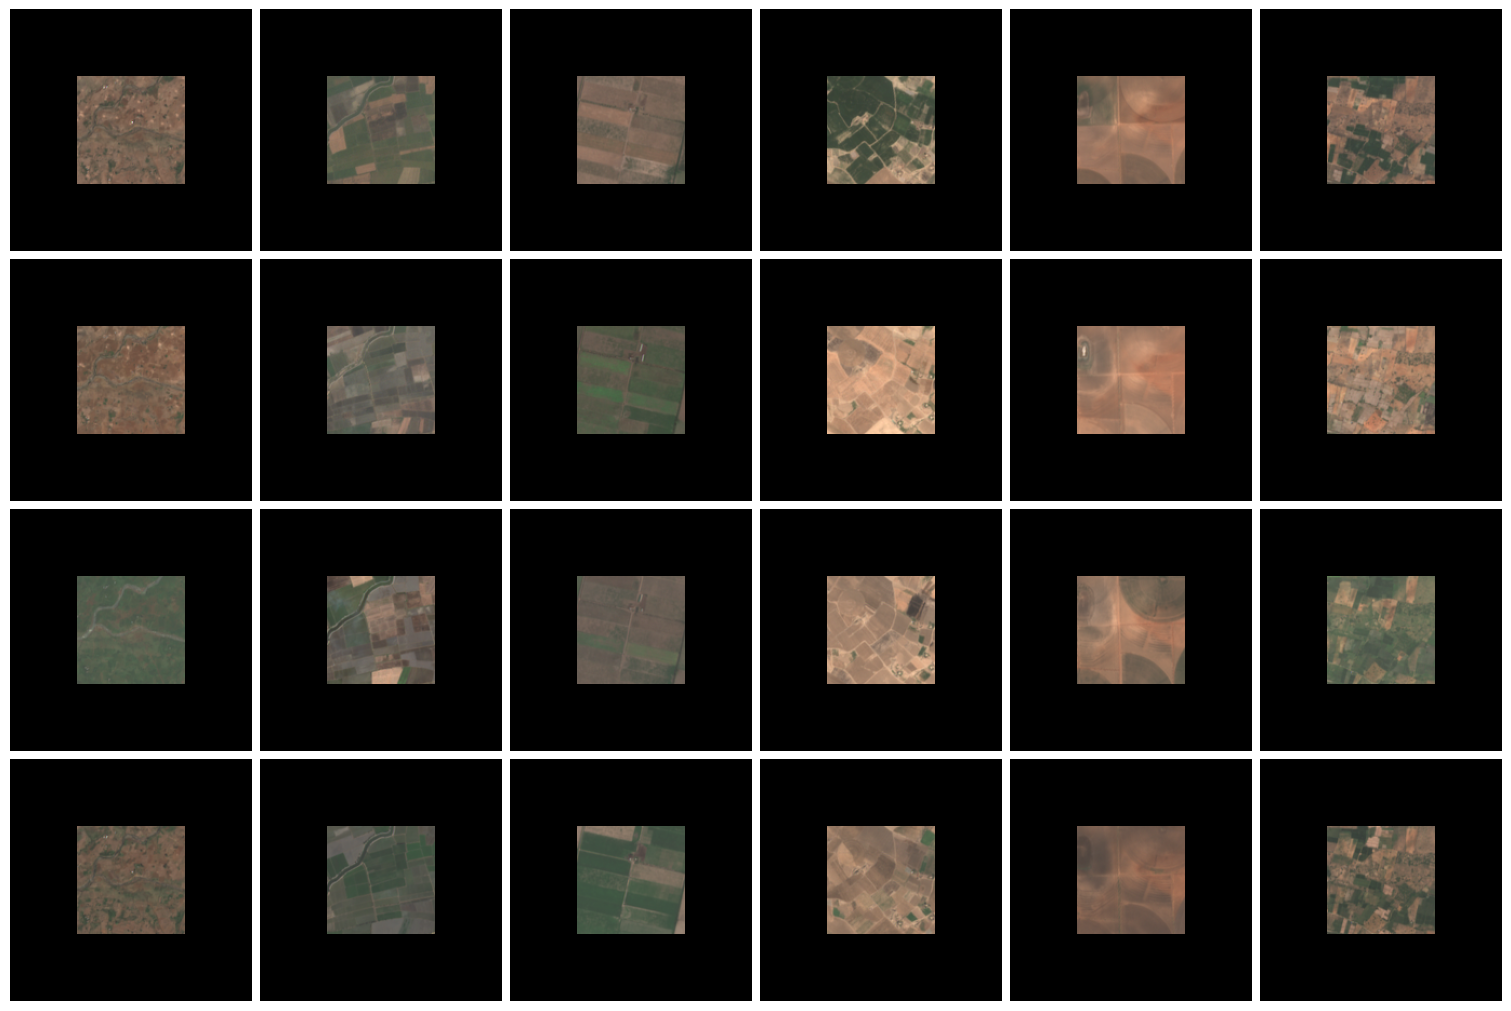

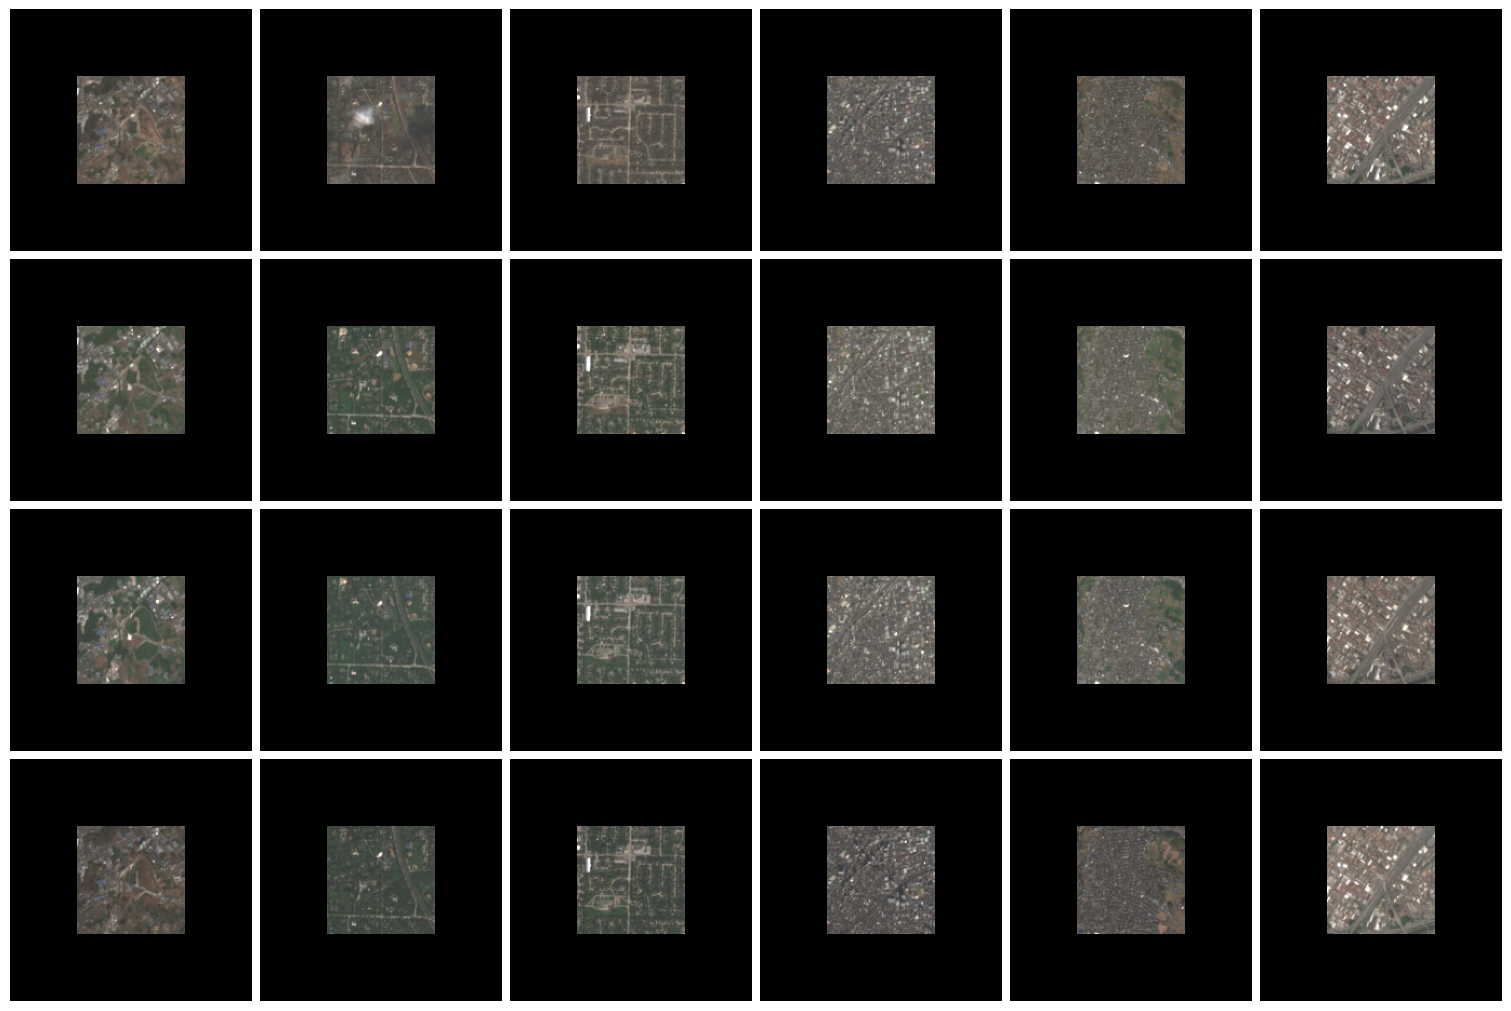

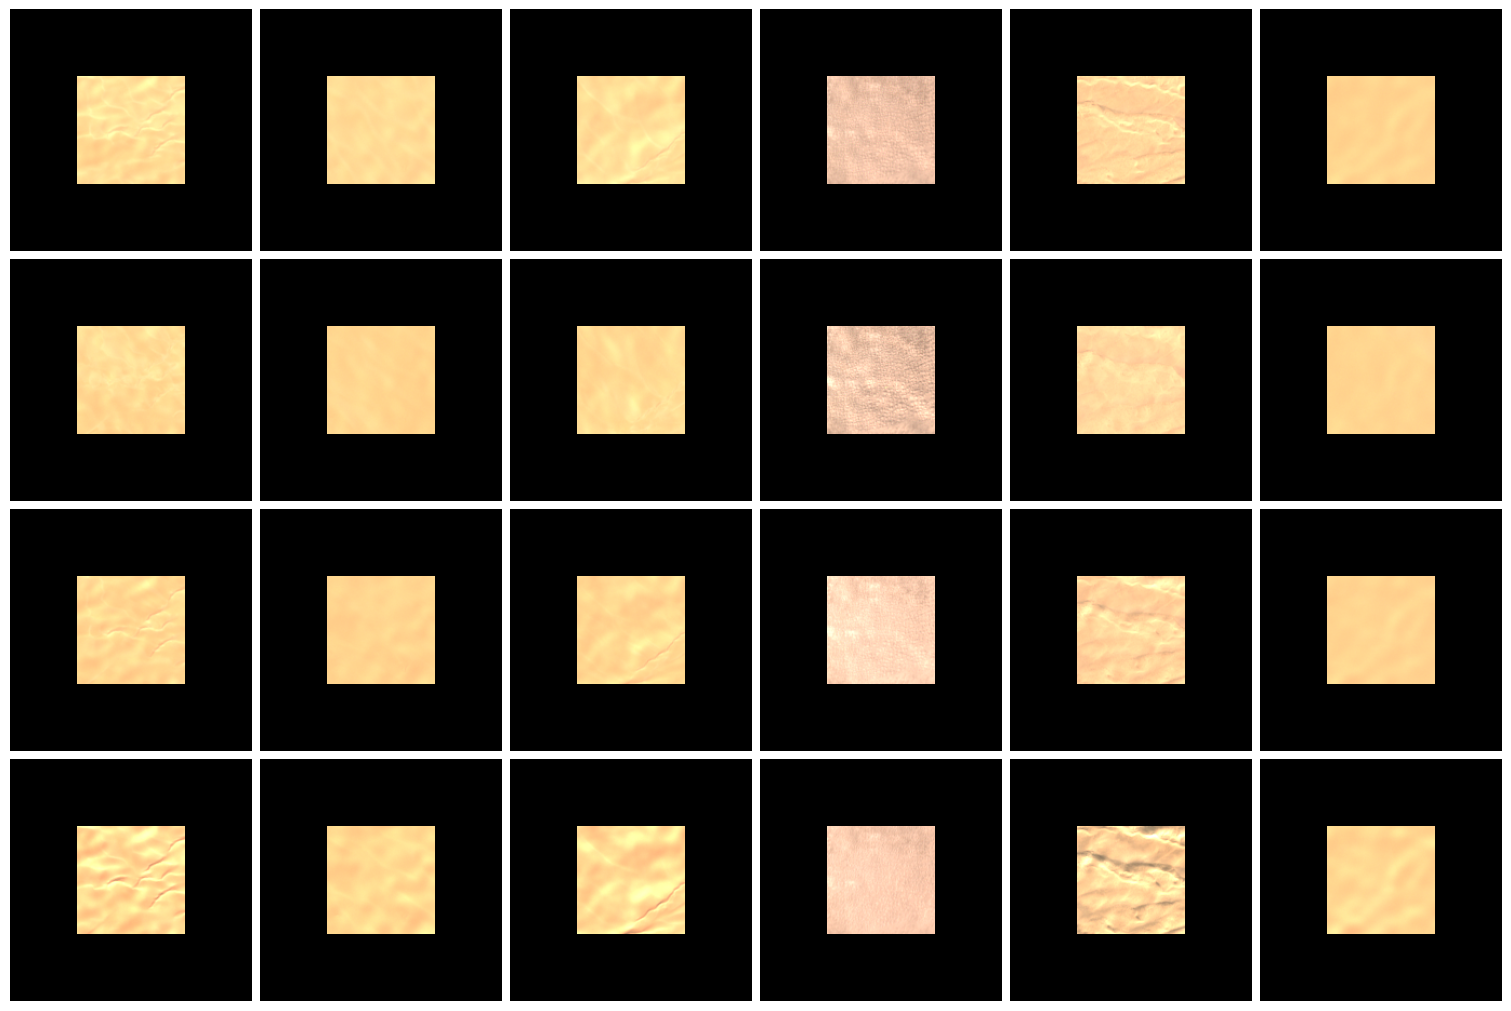

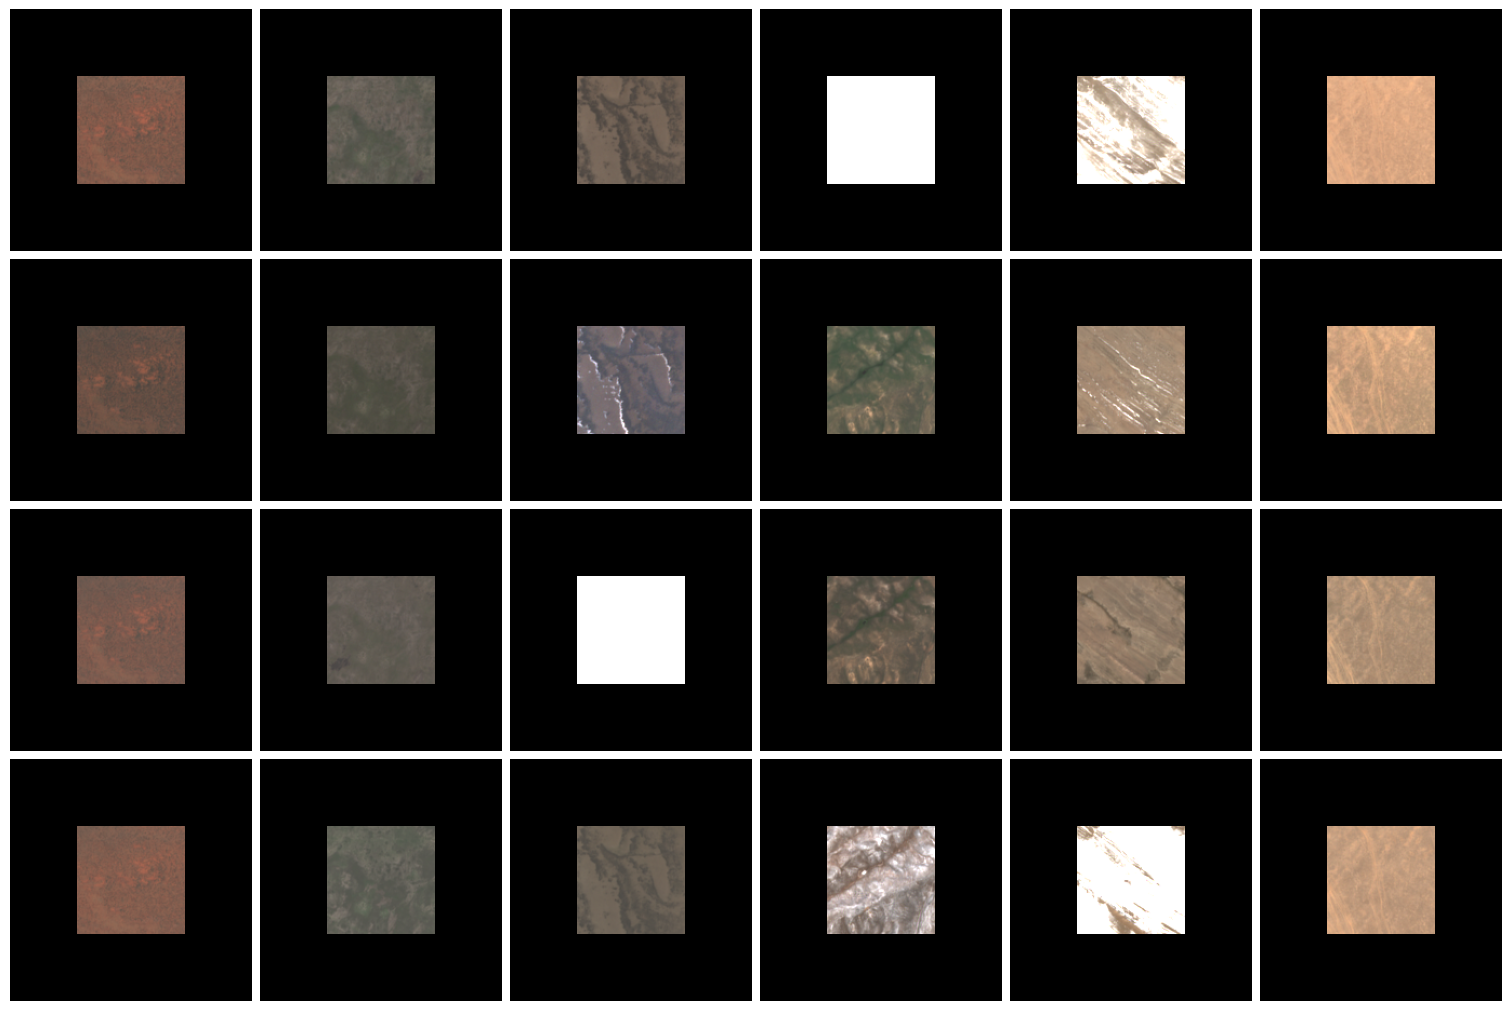

In [156]:
import random
import matplotlib.pyplot as plt
import rasterio
import ast

for ii, lc in enumerate([1, 2, 5, 7, 8, 11]):
    fig, axes = plt.subplots(4, 6, figsize = (15, 10), layout="constrained")
    df = cleaned_df[cleaned_df["lc"] == lc]
    df_elements = df.sample(n=6)
    j = 0
    for index, chip in df_elements.iterrows():
        times = ast.literal_eval(chip["dates"])
        for i, time in enumerate(times):
            file_path = f"/home/benchuser/final_data/s2_{chip["chip_id"]:06}_{time}.tif"
            with rasterio.open(file_path, 'r') as src:
                img = src.read(fill_value=0)
            axes[i, j].imshow(np.flip(img[:3,:,:], 0).transpose(1,2,0)/5000, vmax=0.9)
            # axes[0].set_title("RGB Visualization of S2 Input")
            axes[i, j].set_axis_off()
        j +=1    
    plt.savefig(f"/home/benchuser/samples_lc_{lc:02}.png", dpi = 600)

In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile("final_data/data.zip", "r") as zip_ref:
    zip_ref.extractall("final_data/")